In [1]:
import sklearn
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from funcs.utils import *
from funcs.explain import *
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from funcs.DIMV import DIMVImputation
from funcs.miss_forest import mf

missing_rate = 0.4
nruns = 10
ouput_name = 'XGBRegressor_california_rate04'  

X, y = shap.datasets.california() #(n_points=1000)

def get_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

    y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train = pd.DataFrame(scaler_y.transform(y_train))
    y_test = pd.DataFrame(scaler_y.transform(y_test))    
    X_train_star = generate_missing_data(X_train, rate=missing_rate)
    X_test_star = generate_missing_data(X_test, rate=missing_rate) 
    return X_train, X_train_star, y_train, X_test, X_test_star, y_test

chosen_model = xgboost.XGBRegressor(n_estimators=100, max_depth=2)


Instructions for updating:
non-resource variables are not supported in the long term


# Generate missing data, impute, and use SHAP to explain

In [2]:
results = []
for i in range(nruns):
    X_train, X_train_star, y_train, X_test, X_test_star, y_test = get_split()
    print('iteration:',i)
    results.append(one_run(X_train, X_train_star, y_train, X_test, X_test_star, y_test, chosen_model))

iteration: 0


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.94it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.27it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.32it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.30it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.25it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.16it/s]


Validation result: best alpha 0.1, best score 0.8619226309713266, scores {0.0: 0.8654530171250376, 0.01: 0.86266869036227, 0.1: 0.8619226309713266, 1.0: 0.9129248496365465, 10.0: 1.007653749189582, 100.0: 1.0311514880536305}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.04it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.22it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.24it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.24it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.20it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.21it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.28it/s]


Validation result: best alpha 0.1, best score 0.8619226309713266, scores {0.0: 0.8654530171250376, 0.01: 0.86266869036227, 0.1: 0.8619226309713266, 1.0: 0.9129248496365465, 10.0: 1.007653749189582, 100.0: 1.0311514880536305}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40.61it/s]


loss 0.20177648737890658
loss 0.06305120758001269
loss 0.08520523814370168
loss 0.09721981931622761
loss 0.08422833051169087
loss 0.11795709008481912
loss 0.15126034448795553
loss 0.1898134651778672
loss 0.22201291211438548
loss 0.2616923067166472
number of runs used by missForest: 10
loss: 0.2616923067166472
loss 0.21502935061746858
loss 0.07139474705636269
loss 0.06956940492221218
loss 0.09118704819029118
loss 0.0998075105798649
loss 0.1230801341668267
loss 0.15299794809751402
loss 0.1984246141216692
loss 0.23429530119781133
loss 0.2720996613823914
number of runs used by missForest: 10
loss: 0.2720996613823914



100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 493.91it/s]


iteration: 1


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.90it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.01it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.06it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.78it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.08it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.14it/s]


Validation result: best alpha 0.1, best score 0.8650051622027546, scores {0.0: 0.9957854000714051, 0.01: 24.148371031913232, 0.1: 0.8650051622027546, 1.0: 0.9221082610890242, 10.0: 1.0259818993279257, 100.0: 1.051400737445848}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 16.21it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.01it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.01it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  8.00it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.95it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.17it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.08it/s]


Validation result: best alpha 0.1, best score 0.8650051622027546, scores {0.0: 0.995785400071405, 0.01: 24.14837103191323, 0.1: 0.8650051622027546, 1.0: 0.9221082610890242, 10.0: 1.0259818993279257, 100.0: 1.051400737445848}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40.30it/s]


loss 0.23625007756888974
loss 0.05686101479675661
loss 0.07992953325949259
loss 0.07787523305883645
loss 0.12432087812101333
loss 0.16213151396375267
loss 0.22231925098289998
loss 0.26576377394110456
loss 0.27519456369865963
loss 0.29045374364260923
number of runs used by missForest: 10
loss: 0.29045374364260923
loss 0.1994387205848511
loss 0.08006994998679624
loss 0.08238891832469278
loss 0.10639094623936114
loss 0.12017655376453396
loss 0.16241703061758622
loss 0.1786970724954766
loss 0.2435718222562758
loss 0.28738875189142593
loss 0.27297832240742204
number of runs used by missForest: 10
loss: 0.27297832240742204


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 561.79it/s]


iteration: 2


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.94it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.13it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.17it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.21it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.20it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.03it/s]


Validation result: best alpha 0.0, best score 0.8395778298669433, scores {0.0: 0.8395778298669433, 0.01: 0.8397491752128784, 0.1: 0.845329455169608, 1.0: 0.8952773946263364, 10.0: 0.9773000652910958, 100.0: 0.9972890790099022}
Value alpha used in for transforming is: 0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.16it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.17it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.18it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.14it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.21it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.17it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.21it/s]


Validation result: best alpha 0.0, best score 0.8395778298669433, scores {0.0: 0.8395778298669433, 0.01: 0.8397491752128785, 0.1: 0.845329455169608, 1.0: 0.8952773946263364, 10.0: 0.9773000652910959, 100.0: 0.9972890790099022}
Value alpha used in for transforming is: 0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40.51it/s]


loss 0.23580998750915683
loss 0.05579087285872494
loss 0.06030493412321111
loss 0.08093049749869939
loss 0.11801243483319607
loss 0.14136582570276007
loss 0.1795448663447784
loss 0.21231636239919524
loss 0.27070450509007604
loss 0.3248083160005316
number of runs used by missForest: 10
loss: 0.3248083160005316
loss 0.25304887173094714
loss 0.05422405412792926
loss 0.05173064642805757
loss 0.09297771059368615
loss 0.11500065579531615
loss 0.1113596269317517
loss 0.14278185714437208
loss 0.1832198477189115
loss 0.2143586469486163
loss 0.25167496587154486
number of runs used by missForest: 10
loss: 0.25167496587154486


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 539.14it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


iteration: 3


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.90it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.02it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.94it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.05it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.84it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.82it/s]


Validation result: best alpha 0.1, best score 0.8724744034661571, scores {0.0: 0.8817197411065536, 0.01: 0.8774891377962167, 0.1: 0.8724744034661571, 1.0: 0.907754905306846, 10.0: 0.9784928773728494, 100.0: 0.996542553839363}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.78it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.94it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.99it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.03it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.80it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.89it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.18it/s]


Validation result: best alpha 0.1, best score 0.8724744034661573, scores {0.0: 0.8817197411065536, 0.01: 0.8774891377962168, 0.1: 0.8724744034661573, 1.0: 0.9077549053068461, 10.0: 0.9784928773728495, 100.0: 0.996542553839363}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40.50it/s]


loss 0.22853637209943564
loss 0.06935978555655165
loss 0.05686200696402625
loss 0.07388888798192622
loss 0.10943073271971683
loss 0.13334377450439489
loss 0.16148788965461536
loss 0.192181078426358
loss 0.23734684343062165
loss 0.2647895181530716
number of runs used by missForest: 10
loss: 0.2647895181530716
loss 0.2338492741091682
loss 0.07033417853859869
loss 0.06097207444494296
loss 0.0769832692244464
loss 0.10479673383947789
loss 0.13544158586456234
loss 0.177275853833086
loss 0.2106715644342374
loss 0.22618473737622655
loss 0.2605891935631697
number of runs used by missForest: 10
loss: 0.2605891935631697


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 536.59it/s]


iteration: 4


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.94it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.97it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.05it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.04it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.13it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s]


Validation result: best alpha 0.0, best score 0.843824407194361, scores {0.0: 0.843824407194361, 0.01: 0.8440160499387703, 0.1: 0.849407849230571, 1.0: 0.893321016733248, 10.0: 0.9690267980604033, 100.0: 0.9879064515957074}
Value alpha used in for transforming is: 0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.42it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.01it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.12it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.06it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s]


Validation result: best alpha 0.0, best score 0.8438244071943611, scores {0.0: 0.8438244071943611, 0.01: 0.8440160499387702, 0.1: 0.849407849230571, 1.0: 0.893321016733248, 10.0: 0.9690267980604033, 100.0: 0.9879064515957077}
Value alpha used in for transforming is: 0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 41.13it/s]


loss 0.21881758101934098
loss 0.06479314003068176
loss 0.06802806470343989
loss 0.07765399564843169
loss 0.12045120993344749
loss 0.14144904062225516
loss 0.14977225320258378
loss 0.18467388943304472
loss 0.21510311863422327
loss 0.24403195942591632
number of runs used by missForest: 10
loss: 0.24403195942591632
loss 0.17946565663562797
loss 0.05861422622269911
loss 0.06847280624812654
loss 0.07460457054785559
loss 0.12982257002213604
loss 0.19065990120421636
loss 0.21913523679273783
loss 0.2441979073839388
loss 0.2934163821383407
loss 0.33986190650875125
number of runs used by missForest: 10
loss: 0.33986190650875125


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 552.36it/s]


iteration: 5


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.92it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.13it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.13it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.13it/s]


Validation result: best alpha 0.01, best score 0.7449763013005034, scores {0.0: 0.7454905787346732, 0.01: 0.7449763013005034, 0.1: 0.7480847626194507, 1.0: 0.7920941698792245, 10.0: 0.869694429179378, 100.0: 0.8890048924319842}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.14it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.18it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.02it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.17it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.16it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.14it/s]


Validation result: best alpha 0.01, best score 0.7449763013005035, scores {0.0: 0.745490578734673, 0.01: 0.7449763013005035, 0.1: 0.7480847626194507, 1.0: 0.7920941698792245, 10.0: 0.869694429179378, 100.0: 0.8890048924319841}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40.19it/s]


loss 0.24013510654584205
loss 0.07308866916939767
loss 0.07372153152408502
loss 0.08407447834361931
loss 0.10696699884657708
loss 0.14707108089798723
loss 0.18414496789258714
loss 0.2243435548254332
loss 0.26502051926041414
loss 0.3060953706365377
number of runs used by missForest: 10
loss: 0.3060953706365377
loss 0.19075295889389565
loss 0.05883427663032973
loss 0.06635146776021125
loss 0.07565361956152207
loss 0.0869543738907761
loss 0.10854601235284642
loss 0.13364851925410173
loss 0.16368002874568213
loss 0.21460777686978855
loss 0.24662218571726868
number of runs used by missForest: 10
loss: 0.24662218571726868


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 540.42it/s]


iteration: 6


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.01it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.12it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.07it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.08it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.03it/s]


Validation result: best alpha 0.1, best score 0.8738035144679431, scores {0.0: 0.8956536173811802, 0.01: 0.8834958324344714, 0.1: 0.8738035144679431, 1.0: 0.932496564691985, 10.0: 1.0398777394856222, 100.0: 1.0661035053373396}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.89it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.07it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.12it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.97it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.09it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.02it/s]


Validation result: best alpha 0.1, best score 0.8738035144679431, scores {0.0: 0.8956536173811802, 0.01: 0.8834958324344714, 0.1: 0.8738035144679431, 1.0: 0.932496564691985, 10.0: 1.0398777394856222, 100.0: 1.0661035053373396}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40.81it/s]


loss 0.18699872010344093
loss 0.0529481134819255
loss 0.05574825037103655
loss 0.06966148188093733
loss 0.09058474980229311
loss 0.12104594256687685
loss 0.15437384836599394
loss 0.18109120369249324
loss 0.21398243258339977
loss 0.23625561633505548
number of runs used by missForest: 10
loss: 0.23625561633505548
loss 0.20406600887912388
loss 0.05651943537356285
loss 0.053945463498057726
loss 0.06657208383803265
loss 0.08704477457820697
loss 0.11251790234591101
loss 0.1478625285402475
loss 0.1761246190432779
loss 0.20684222547168024
loss 0.23978668055550037
number of runs used by missForest: 10
loss: 0.23978668055550037


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 541.40it/s]


iteration: 7


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.90it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.01it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.04it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.99it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.97it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s]


Validation result: best alpha 0.1, best score 0.8033032500133347, scores {0.0: 0.8229086089413369, 0.01: 0.8127762682116341, 0.1: 0.8033032500133347, 1.0: 0.8418794603530145, 10.0: 0.9236432519917698, 100.0: 0.9442261848332174}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.73it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.03it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.02it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.12it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.08it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.97it/s]


Validation result: best alpha 0.1, best score 0.8033032500133348, scores {0.0: 0.8229086089413369, 0.01: 0.8127762682116341, 0.1: 0.8033032500133348, 1.0: 0.8418794603530146, 10.0: 0.9236432519917698, 100.0: 0.9442261848332174}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 39.79it/s]


loss 0.23554439033674246
loss 0.07316500697715672
loss 0.07192632009693259
loss 0.0901041825042941
loss 0.11788361014746652
loss 0.14843016488764005
loss 0.18959979255343798
loss 0.23046658962467492
loss 0.25508088109555244
loss 0.2920684563041403
number of runs used by missForest: 10
loss: 0.2920684563041403
loss 0.2336028320290069
loss 0.06937074447363187
loss 0.06838929296627876
loss 0.08312044591888074
loss 0.11002165516237922
loss 0.14007587462390653
loss 0.17267743534833918
loss 0.20647450778715415
loss 0.2272210668451747
loss 0.2685399698560361
number of runs used by missForest: 10
loss: 0.2685399698560361


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 531.80it/s]


iteration: 8


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.85it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.97it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.01it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.95it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  8.00it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.09it/s]


Validation result: best alpha 0.01, best score 0.8789927156421826, scores {0.0: 0.8796537792568146, 0.01: 0.8789927156421826, 0.1: 0.8790814965814574, 1.0: 0.9157639113484515, 10.0: 0.991576088722994, 100.0: 1.010973135033846}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.05it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.11it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.99it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.15it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.01it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  8.00it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.01it/s]


Validation result: best alpha 0.01, best score 0.8789927156421826, scores {0.0: 0.8796537792568145, 0.01: 0.8789927156421826, 0.1: 0.8790814965814575, 1.0: 0.9157639113484515, 10.0: 0.991576088722994, 100.0: 1.0109731350338458}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40.19it/s]


loss 0.2167536008639641
loss 0.0767254360997082
loss 0.0852312773758724
loss 0.0892073262644465
loss 0.11442040177857697
loss 0.14100895216143702
loss 0.17800828493427798
loss 0.2093244550209038
loss 0.217543453786282
loss 0.27827735307753787
number of runs used by missForest: 10
loss: 0.27827735307753787
loss 0.2336765040564597
loss 0.09285631975085838
loss 0.07931774554755353
loss 0.10162211218215292
loss 0.11596878037858363
loss 0.1439620097879151
loss 0.17640855718532103
loss 0.2125924483720507
loss 0.25900687733887207
loss 0.3046128995508048
number of runs used by missForest: 10
loss: 0.3046128995508048


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 505.56it/s]


iteration: 9


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.57it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.76it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.77it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.54it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.77it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.81it/s]


Validation result: best alpha 0.01, best score 0.8435560651514514, scores {0.0: 0.8436184514160312, 0.01: 0.8435560651514514, 0.1: 0.8486362198545556, 1.0: 0.8977917979345349, 10.0: 0.9849349727374193, 100.0: 1.0065794937435055}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 16.80it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.82it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.74it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.73it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.83it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.83it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.77it/s]


Validation result: best alpha 0.01, best score 0.8435560651514513, scores {0.0: 0.8436184514160313, 0.01: 0.8435560651514513, 0.1: 0.8486362198545555, 1.0: 0.897791797934535, 10.0: 0.9849349727374193, 100.0: 1.0065794937435055}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 39.21it/s]


loss 0.23109750800247017
loss 0.062218330040461525
loss 0.07281864641397891
loss 0.08417403757399028
loss 0.11369513230604526
loss 0.13269730624300372
loss 0.15791937880520543
loss 0.20370527817498316
loss 0.2365618776558917
loss 0.25638560876406047
number of runs used by missForest: 10
loss: 0.25638560876406047
loss 0.2526698608471561
loss 0.07166056953830029
loss 0.0745787475027741
loss 0.08082030244803753
loss 0.1010346482537984
loss 0.13496860717776804
loss 0.17098746682215216
loss 0.19135797775086447
loss 0.24219174721807057
loss 0.2918636824395186
number of runs used by missForest: 10
loss: 0.2918636824395186


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 509.71it/s]


So, the first layer of results is the result of each run. Then, for the sub-level:
- level 0: shape_values_ori, shap_values_xm...
- level 1:  other_measures = [mse_imputation_all, mse_shap_all, mse_ypred_all, cor_ypred_all, spearman_ypred]

In [3]:
def get_average_shap_vals(results, j, nruns):
    # get the average shap values from all runs for each imputation method or the original 
    current = results[0][0][j]
    for i in range(1, nruns):
        current.values += results[i][0][j].values
        current.base_values += results[i][0][j].base_values
        current.data += results[i][0][j].data  
    current.values = current.values/nruns
    current.base_values = current.base_values/nruns
    current.data = current.data/nruns
    return current

In [4]:
shap_values_ori = get_average_shap_vals(results, j = 0, nruns= nruns)
shap_values_xm = get_average_shap_vals(results, j = 1, nruns= nruns)
shap_values_mi = get_average_shap_vals(results, j = 2, nruns = nruns)
shap_values_mice = get_average_shap_vals(results, j = 3, nruns= nruns)
shap_values_dimv = get_average_shap_vals(results, j = 4, nruns= nruns)
shap_values_mf = get_average_shap_vals(results, j = 5, nruns= nruns)
shap_values_soft = get_average_shap_vals(results, j = 6, nruns= nruns)
shap_values_gain = get_average_shap_vals(results, j = 7, nruns= nruns)

In [5]:
ranking_res = shap_ranking_table(X_train, shap_values_ori,shap_values_xm, shap_values_mi, shap_values_mice,
                   shap_values_dimv, shap_values_mf, shap_values_soft, shap_values_gain)

combined_feature_importance
\begin{tabular}{lrrrrrrrr}
\toprule
 & Original & Xgb on missing data & Mean Imputation & MICE & DIMV & missForest & SOFT-IMPUTE & GAIN \\
Ranking &  &  &  &  &  &  &  &  \\
\midrule
Latitude & 0.191 & 0.385 & 0.055 & 0.086 & 0.109 & 0.077 & 0.077 & 0.053 \\
Longitude & 0.183 & 0.450 & 0.063 & 0.085 & 0.106 & 0.078 & 0.070 & 0.060 \\
MedInc & 0.140 & 0.654 & 0.113 & 0.131 & 0.127 & 0.111 & 0.120 & 0.110 \\
AveOccup & 0.057 & 0.073 & 0.050 & 0.042 & 0.045 & 0.053 & 0.049 & 0.049 \\
AveRooms & 0.022 & 0.114 & 0.042 & 0.020 & 0.029 & 0.045 & 0.037 & 0.038 \\
HouseAge & 0.017 & 0.055 & 0.019 & 0.024 & 0.024 & 0.019 & 0.025 & 0.020 \\
AveBedrms & 0.013 & 0.089 & 0.008 & 0.016 & 0.014 & 0.011 & 0.012 & 0.011 \\
Population & 0.005 & 0.012 & 0.003 & 0.006 & 0.007 & 0.008 & 0.006 & 0.006 \\
\bottomrule
\end{tabular}



In [6]:
    j = 0
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]
    mse_imputation_all = mse_now/nruns  
    print("the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:")
    print(mse_imputation_all.round(3))

    j = 1
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]    
    mse_shap_all = mse_now/nruns 
    print("the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_shap_all.round(3))

    j = 2
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    mse_ypred_all = mse_ypred_now/nruns 
    print("the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_ypred_all.round(3))

    j = 3
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data")
    print(spearman_ypred.round(3))

    j = 4
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between imputed features")
    print(spearman_ypred.round(3))

the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:
[ 0.341  0.376  0.276  0.283  0.249 31.154]
the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.345 0.129 0.082 0.067 0.093 0.1   0.142]
the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.238 0.25  0.271 0.268 0.239 0.262 0.3  ]
the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data
[[0.825 0.   ]
 [0.813 0.   ]
 [0.793 0.   ]
 [0.796 0.   ]
 [0.817 0.   ]
 [0.804 0.   ]
 [0.77  0.   ]]
the ranking correlation for spearman rank correlation between imputed features
[[ 0.422  0.374  0.352  0.448  0.477  0.51   0.479  0.485]
 [ 0.79   0.538  0.597 -0.067    nan  0.694  0.608  0.418]
 [ 0.817  0.574  0.267  0.533  0.421  0.612  0.822  0.801]
 [ 0.822  0.594  0.234  0.49

In [7]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'Spearman statistic': spearman_ypred[:,0]}, index = ['Xgb on missing data','Mean Imputation','MICE','DIMV','missForest','SOFT-IMPUTE','GAIN'])
dfplot

,MSE,Spearman statistic
Xgb on missing data,0.000000,0.422353
Mean Imputation,0.340984,0.790478
MICE,0.375512,0.817104
DIMV,0.276022,0.822196
missForest,0.283455,0.794858
SOFT-IMPUTE,0.249099,0.808808
GAIN,31.153957,0.650266


imputation MSE versus Spearman statistic


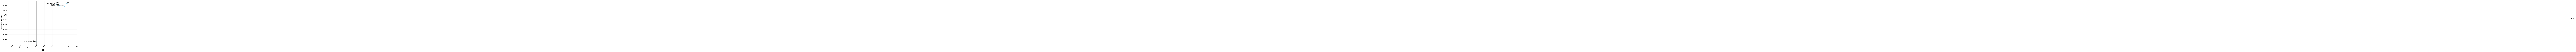

In [8]:
print('imputation MSE versus Spearman statistic')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'], dfplot['Spearman statistic'], color='skyblue')
for i, row in dfplot.iterrows():
    if row.name == 'MICE':
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='left', va='bottom')
    else:
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='right', va='bottom') 
plt.ylabel('Spearman statistic')
plt.xlabel('MSE')
plt.xlim(-.35, 0.5)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_spearman'+'.png',bbox_inches='tight')
plt.show()

In [9]:
dfplot = pd.DataFrame({'MSE on y test':mse_ypred_all, 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE on y test,MSE Shap
Xgb on missing data,0.238255,0.345497
Mean Imputation,0.250484,0.128962
MICE,0.270681,0.081620
DIMV,0.267774,0.067482
missForest,0.238693,0.093007
SOFT-IMPUTE,0.262014,0.100046
GAIN,0.299965,0.142134


imputation MSE versus Shapley MSE


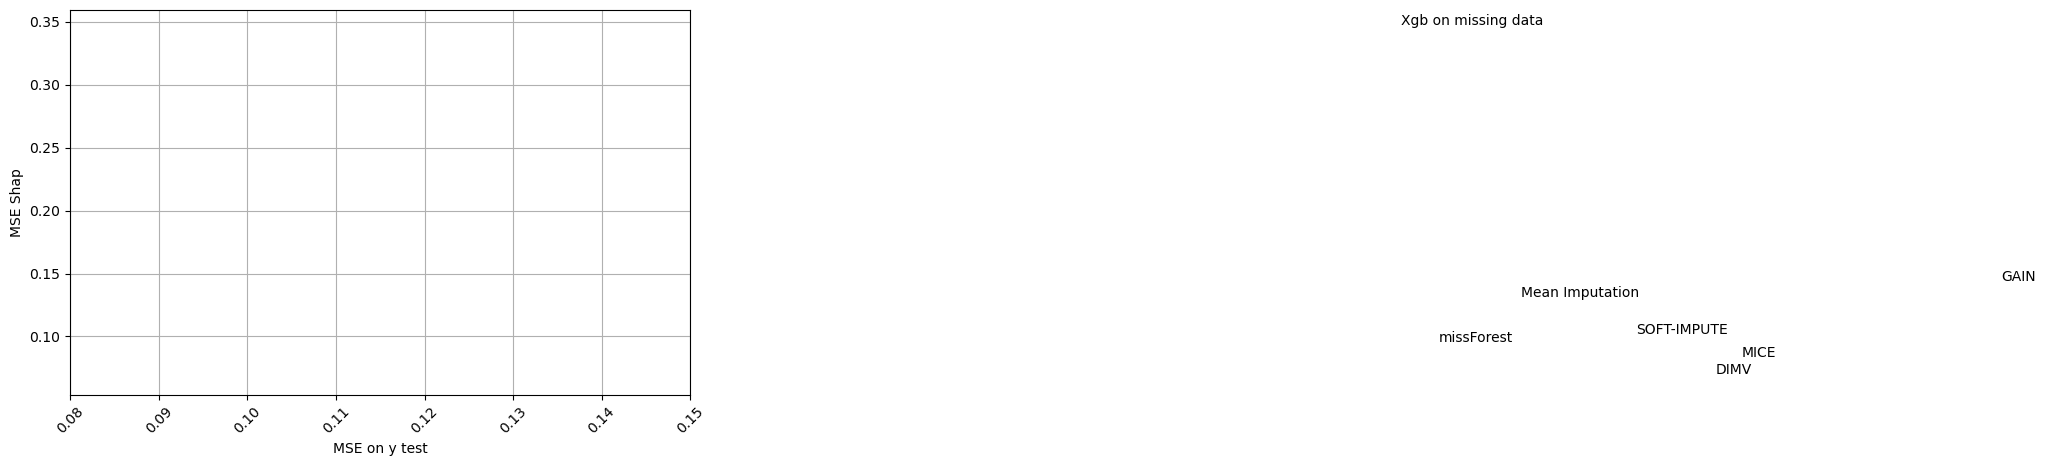

In [10]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE on y test'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE on y test'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE on y test')
plt.xlim(0.08, 0.15)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

In [11]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE,MSE Shap
Xgb on missing data,0.000000,0.345497
Mean Imputation,0.340984,0.128962
MICE,0.375512,0.081620
DIMV,0.276022,0.067482
missForest,0.283455,0.093007
SOFT-IMPUTE,0.249099,0.100046
GAIN,31.153957,0.142134


imputation MSE versus Shapley MSE


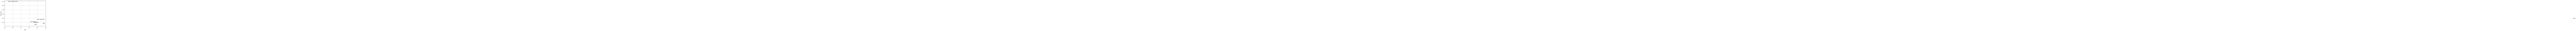

In [12]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE')
plt.xlim(-0.1, 0.4)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

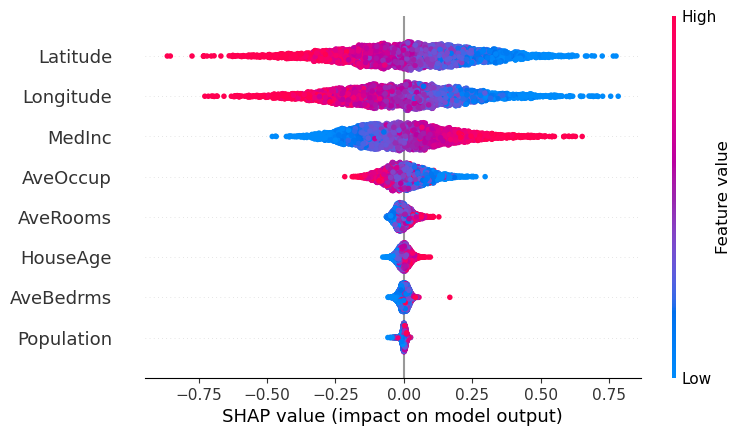

In [13]:
plt.figure()
shap.plots.beeswarm(shap_values_ori, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'ori'+'.png',bbox_inches='tight')
plt.show()

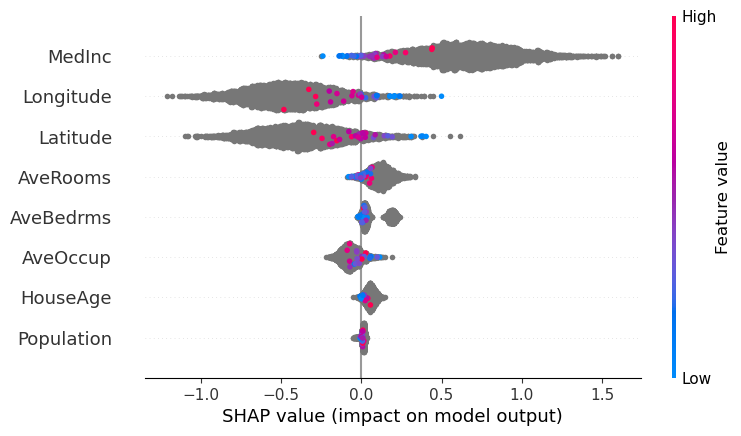

In [14]:
plt.figure()
shap.plots.beeswarm(shap_values_xm, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'xm'+'.png',bbox_inches='tight')
plt.show()

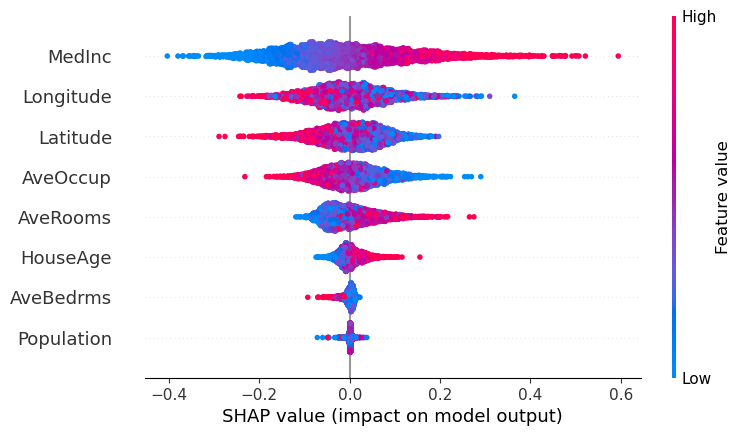

In [15]:
plt.figure()
shap.plots.beeswarm(shap_values_mi, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mi'+'.png',bbox_inches='tight')
plt.show()

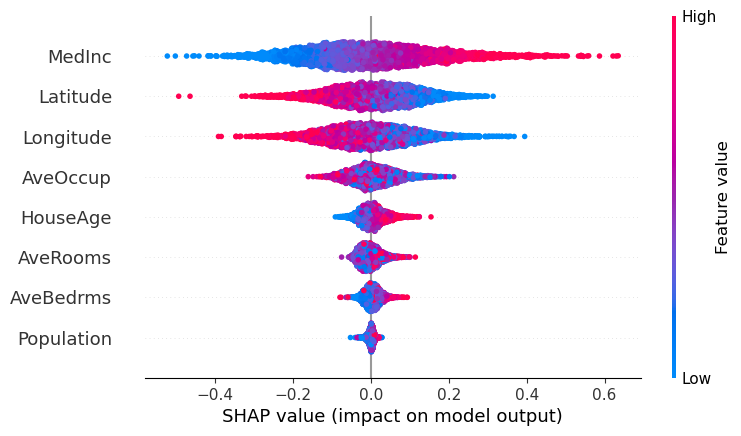

In [16]:
plt.figure()
shap.plots.beeswarm(shap_values_mice, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mice'+'.png',bbox_inches='tight')
plt.show()

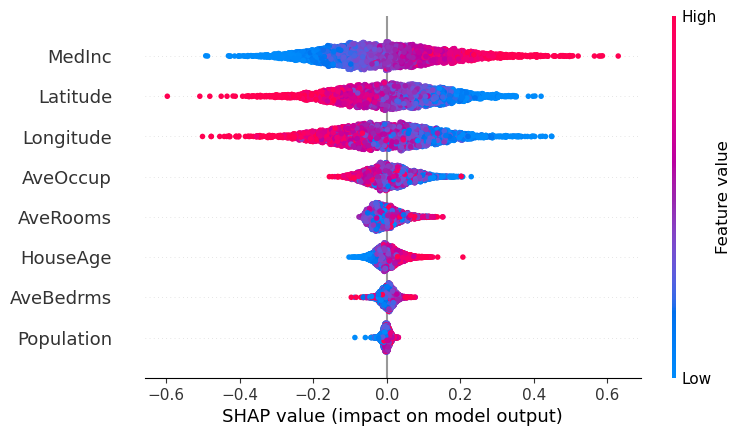

In [17]:
plt.figure()
shap.plots.beeswarm(shap_values_dimv, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'dimv'+'.png',bbox_inches='tight')
plt.show()

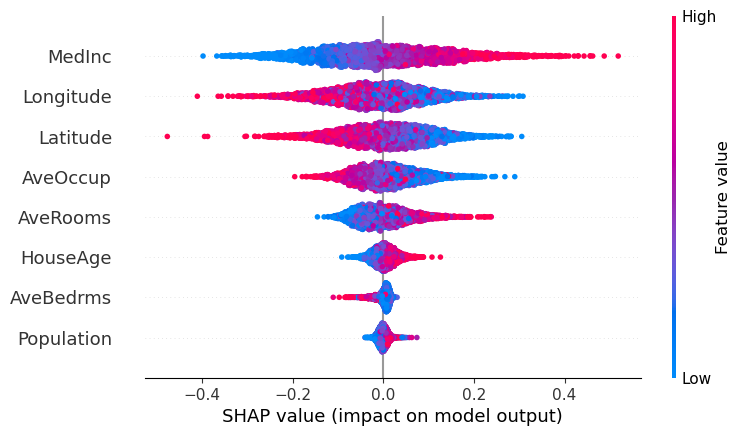

In [18]:
plt.figure()
shap.plots.beeswarm(shap_values_mf, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mf'+'.png',bbox_inches='tight')
plt.show()

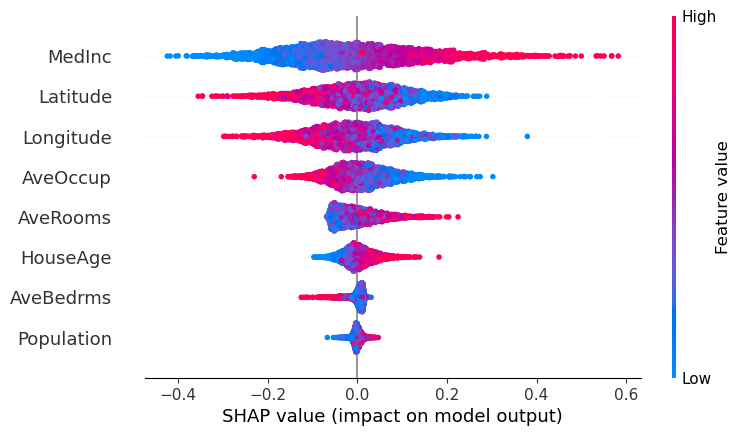

In [19]:
plt.figure()
shap.plots.beeswarm(shap_values_soft, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'soft'+'.png',bbox_inches='tight')
plt.show()

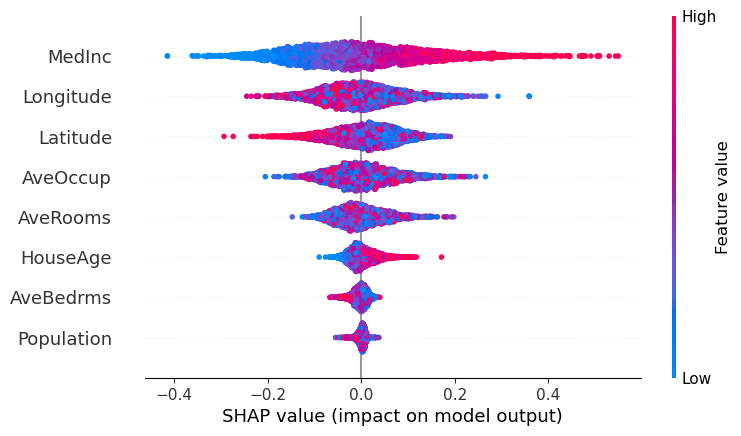

In [20]:
plt.figure()
shap.plots.beeswarm(shap_values_gain, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'gain'+'.png',bbox_inches='tight')
plt.show()

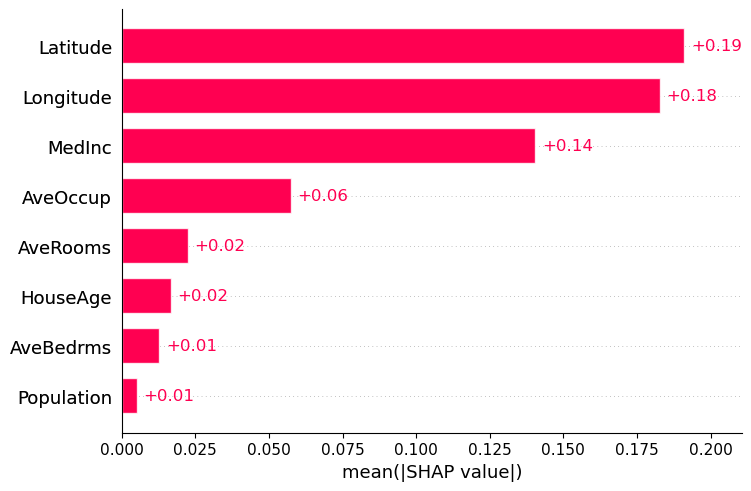

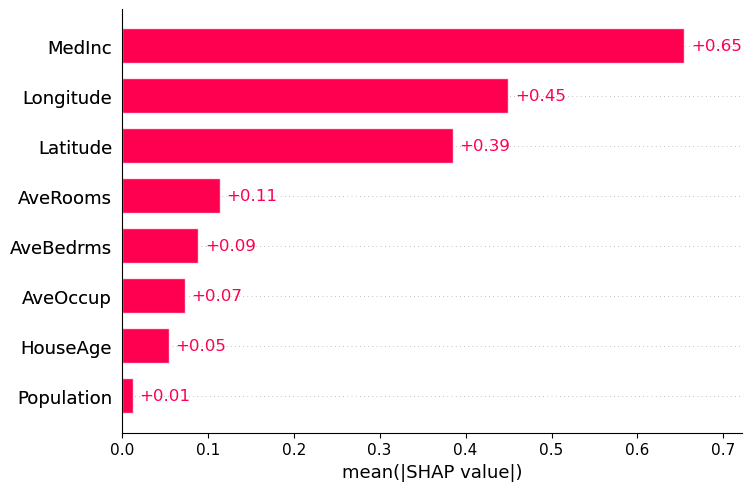

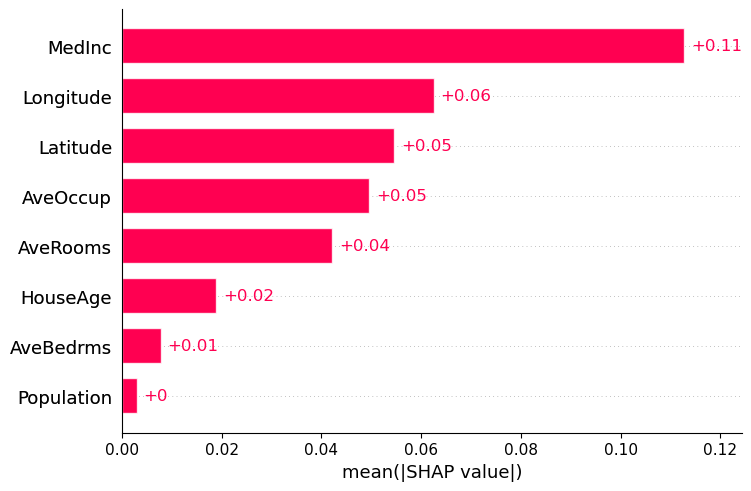

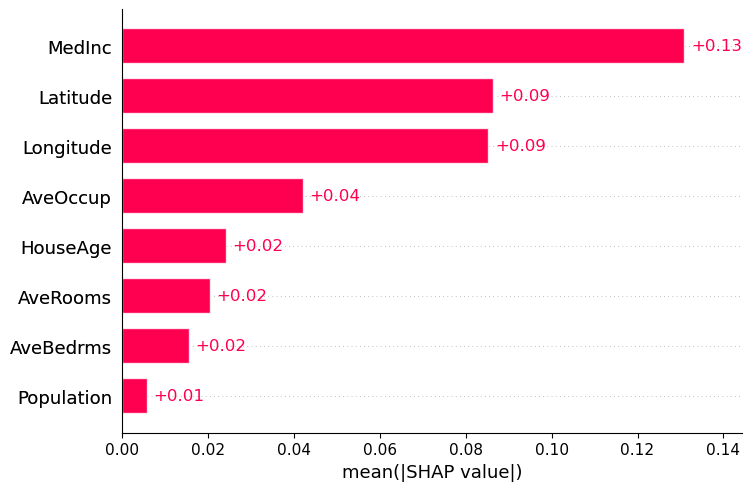

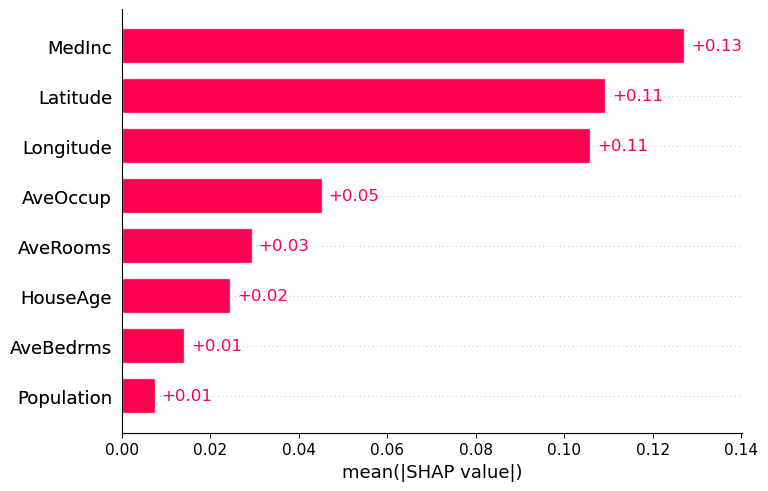

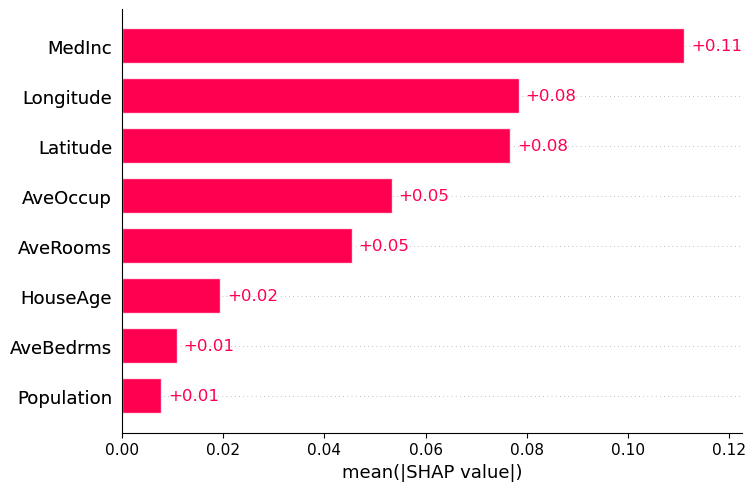

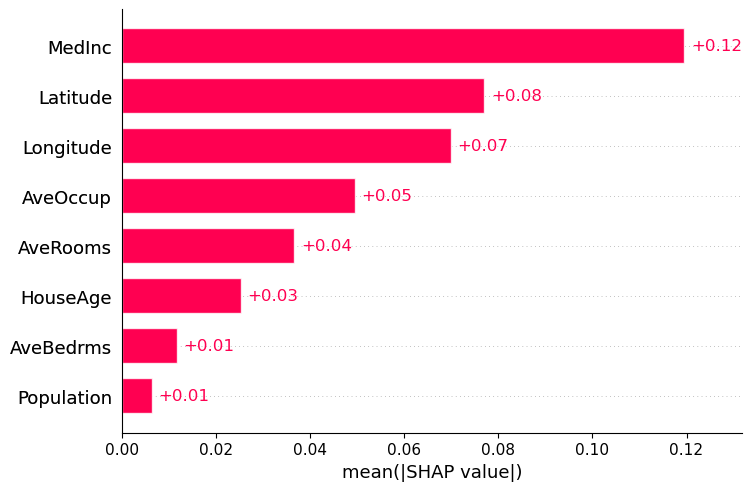

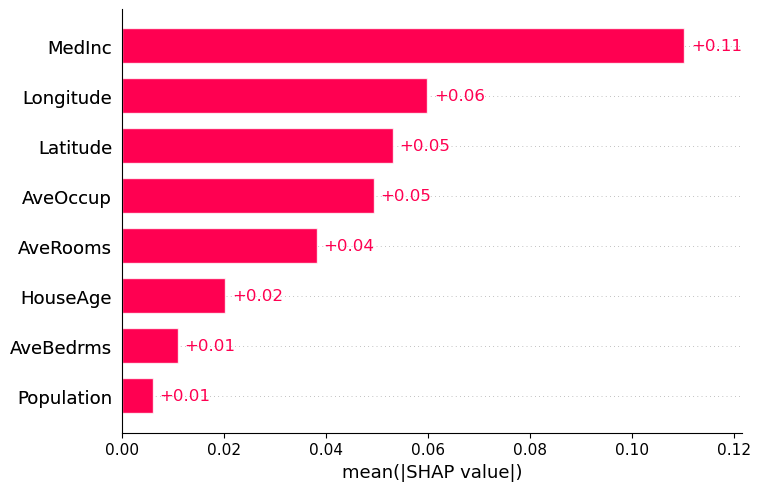

In [21]:
plt.figure()
shap.plots.bar(shap_values_ori, show=False)
plt.savefig('results/'+ouput_name+'bar_ori'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_xm, show=False)
plt.savefig('results/'+ouput_name+'bar_xm'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mi, show=False)
plt.savefig('results/'+ouput_name+'bar_mi'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mice, show=False)
plt.savefig('results/'+ouput_name+'bar_mice'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_dimv, show=False)
plt.savefig('results/'+ouput_name+'bar_dimv'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mf, show=False)
plt.savefig('results/'+ouput_name+'bar_mf'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_soft, show=False)
plt.savefig('results/'+ouput_name+'bar_soft'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_gain, show=False)
plt.savefig('results/'+ouput_name+'bar_gain'+'.png',bbox_inches='tight')

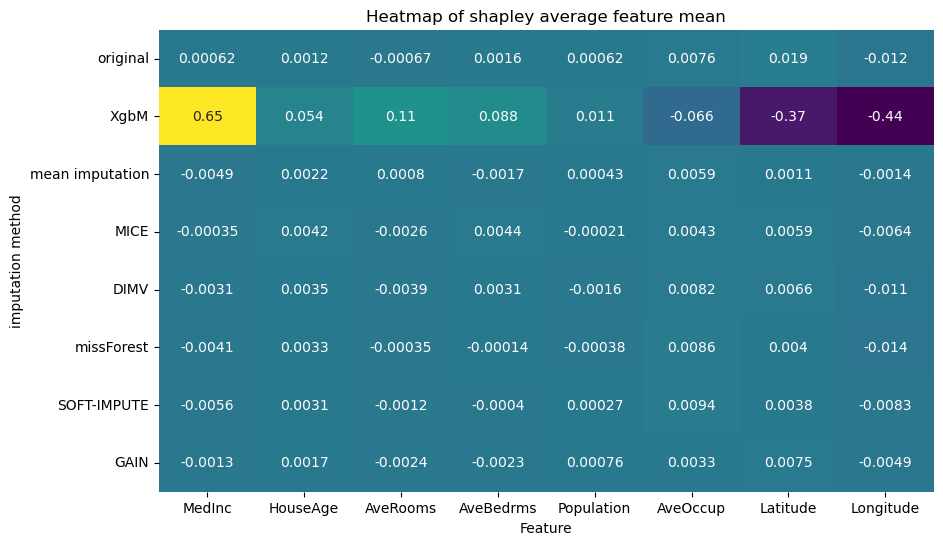

In [22]:
column_mean_ori = np.mean(shap_values_ori.values, axis=0)
column_mean_xm = np.mean(shap_values_xm.values, axis=0)
column_mean_mi = np.mean(shap_values_mi.values, axis=0)
column_mean_mice = np.mean(shap_values_mice.values, axis=0)
column_mean_dimv = np.mean(shap_values_dimv.values, axis=0)
column_mean_mf = np.mean(shap_values_mf.values, axis=0)
column_mean_soft = np.mean(shap_values_soft.values, axis=0)
column_mean_gain = np.mean(shap_values_gain.values, axis=0)
heat_df = pd.DataFrame(np.vstack((column_mean_ori, column_mean_xm,column_mean_mi,column_mean_mice,
                                  column_mean_dimv,column_mean_mf,column_mean_soft, column_mean_gain)))
heat_df.columns = X.columns
heat_df.index = np.array(['original', 'XgbM', 'mean imputation', 'MICE','DIMV','missForest', 'SOFT-IMPUTE', 'GAIN'])
plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, cmap='viridis', annot=True, cbar=False)
plt.title('Heatmap of shapley average feature mean')
plt.xlabel('Feature')
plt.ylabel('imputation method')
plt.savefig('results/'+ouput_name+'heatmap'+'.png',bbox_inches='tight')
plt.show()